# Exploratory Data Analysis 


In [77]:
#standard libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline

In [78]:
#import nhanes data 
df = pd.read_csv('nhanes_extracted.csv')

In [79]:
df.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

In [80]:
df.head()

,SEQN,Gender,Age,Ethnicity,FHx,Fasting Glucose (mmol/L),Two Hour Glucose(OGTT) (mmol/L),How long ago saw a diabetes specialist,Retinopathy,Last time had pupils dilated for exam,...,metformin,other_agents,ace_arbs,eGFR,HbA1c_correct,known_diabetes,hba1c_result,MAP,ogtt_result,diagnostic_t2dm
0,83732,1.0,62.0,3.0,1.0,NaN,NaN,4.0,2.0,2.0,...,1,1,1,90.878589,52.995190,1.0,1.0,83.60,0,1
1,83733,1.0,53.0,3.0,1.0,5.59,NaN,NaN,NaN,NaN,...,0,0,0,78.529438,36.598164,2.0,0.0,102.96,0,0
2,83734,1.0,78.0,3.0,2.0,4.66,8.66,3.0,2.0,2.0,...,0,0,1,67.393831,NaN,1.0,NaN,74.58,0,0
3,83735,2.0,56.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,63.898943,37.691299,2.0,0.0,90.42,0,0
4,83737,2.0,72.0,1.0,1.0,5.93,5.50,NaN,NaN,NaN,...,0,0,0,49.298425,40.970704,2.0,0.0,78.10,0,0


In [81]:
df.shape

(28273, 42)

In [82]:
df.columns

Index(['SEQN', 'Gender', 'Age', 'Ethnicity', 'FHx', 'Fasting Glucose (mmol/L)',
       'Two Hour Glucose(OGTT) (mmol/L)',
       'How long ago saw a diabetes specialist', 'Retinopathy',
       'Last time had pupils dilated for exam', 'bmi',
       'Alanine Aminotransferase (ALT) (U/L)',
       'Albumin, refrigerated serum (g/dL)',
       'Alkaline Phosphatase (ALP) (U/L)',
       'Aspartate Aminotransferase (AST) (U/L)', 'Bicarbonate (mmol/L)',
       'Blood Urea Nitrogen (g/dL)', 'Chloride (mmol/L)',
       'Cholesterol, refrigerated serum (mg/dL)',
       'Creatinine, refrigerated serum (umol/L)',
       'Gamma Glutamyl Transferase (GGT) (U/L)',
       'Glucose, refrigerated serum (mmol/L)', 'Potassium (mmol/L)',
       'Sodium (mmol/L)', 'Total Bilirubin (umol/L)', 'Total Calcium (mmol/L)',
       'Triglycerides, refrig serum (mg/dL)', 'LDL cholesterol (mmol/L)',
       'HDL cholesterol (mmol/L)', 'Prescriptions', 'insulin', 'statin',
       'metformin', 'other_agents', 'ace_arbs', 

In [83]:
#remove participants with no laboratory values 
labs = ['Alanine Aminotransferase (ALT) (U/L)',
       'Albumin, refrigerated serum (g/dL)',
       'Alkaline Phosphatase (ALP) (U/L)',
       'Aspartate Aminotransferase (AST) (U/L)', 'Bicarbonate (mmol/L)',
       'Blood Urea Nitrogen (g/dL)', 'Chloride (mmol/L)',
       'Cholesterol, refrigerated serum (mg/dL)',
       'Creatinine, refrigerated serum (umol/L)',
       'Gamma Glutamyl Transferase (GGT) (U/L)',
       'Glucose, refrigerated serum (mmol/L)', 'Potassium (mmol/L)',
       'Sodium (mmol/L)', 'Total Bilirubin (umol/L)', 'Total Calcium (mmol/L)',
       'Triglycerides, refrig serum (mg/dL)', 'LDL cholesterol (mmol/L)',
       'HDL cholesterol (mmol/L)', 'eGFR', 'Fasting Glucose (mmol/L)',
       'Two Hour Glucose(OGTT) (mmol/L)']

In [84]:
df.dropna(how='all', subset=labs, inplace=True)

In [85]:
df.shape

(25726, 42)

In [86]:
#2547 participants removed because they had no laboratory value recorded 
28273 - 25726

2547

In [87]:
#remove participants with no HbA1c (target variable)

In [88]:
diabetes_tests = ['hba1c_result', 'Fasting Glucose (mmol/L)', 'Two Hour Glucose(OGTT) (mmol/L)']

In [89]:
df.dropna(how='all', subset=diabetes_tests, inplace=True)

In [90]:
df.shape

(23310, 42)

In [92]:
#2416 participants removed because they had no HbA1c value recorded 
25726 - 23310

2416

In [93]:
#final study population 
df.shape

(23310, 42)

# Diabetic Status 

In [129]:
df['known_diabetes'].value_counts(dropna=False)

2.0    20049
1.0     2747
3.0      514
Name: known_diabetes, dtype: int64

In [130]:
df['diagnostic_t2dm'].value_counts(dropna=False)

0    20113
1     3197
Name: diagnostic_t2dm, dtype: int64

# Demographics 

## Coding 

**Known Diabetes**:   
1.0: T2DM   
2.0: No T2DM   
3.0: Prediabetes 

**Gender**:  
1.0: Male  
2.0: Female 

**Ethnicity**:   
1.0: Mexican American   
2.0: Other Hispanic   
3.0: Non-Hispanic White   
4.0: Non-Hispanic Black   
5.0: Other Race including mutli-racial   

**Family History**:   
1.0: Yes  		
2.0: No


In [131]:
df.groupby('known_diabetes')['Gender'].value_counts(dropna=False)

known_diabetes  Gender
1.0             2.0        1421
                1.0        1326
2.0             2.0       10506
                1.0        9543
3.0             2.0         270
                1.0         244
Name: Gender, dtype: int64

In [132]:
df.groupby('known_diabetes')['Ethnicity'].value_counts(dropna=False)

known_diabetes  Ethnicity
1.0             3.0           974
                4.0           664
                1.0           516
                2.0           329
                5.0           264
2.0             3.0          9023
                4.0          3492
                1.0          3090
                5.0          2261
                2.0          2183
3.0             3.0           226
                4.0           103
                1.0            80
                5.0            55
                2.0            50
Name: Ethnicity, dtype: int64

In [133]:
df.groupby('known_diabetes')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
known_diabetes,,,,,,,,
1.0,2747.0,61.543502,12.473009,21.0,53.0,62.0,71.0,80.0
2.0,20049.0,47.794005,17.101117,21.0,33.0,46.0,61.0,80.0
3.0,514.0,58.396887,13.949577,21.0,50.0,60.0,68.0,80.0


In [166]:
known_t2dm_m = df['known_diabetes']==1 
known_t2dm = df[known_t2dm_m]

not_t2dm_m = df['known_diabetes']==2
not_t2dm = df[not_t2dm_m]

In [171]:
import scipy 
from scipy.stats import mannwhitneyu

scipy.stats.mannwhitneyu(known_t2dm['Age'], not_t2dm['Age']) 

MannwhitneyuResult(statistic=14668455.0, pvalue=0.0)

In [134]:
df.groupby('known_diabetes')['FHx'].value_counts(dropna=False)

known_diabetes  FHx
1.0             1.0     1836
                2.0      843
                NaN       68
2.0             2.0    12476
                1.0     7189
                NaN      384
3.0             1.0      303
                2.0      201
                NaN       10
Name: FHx, dtype: int64

# Current Diabetic Status 


In [135]:
df['known_diabetes'].value_counts(dropna=False)

2.0    20049
1.0     2747
3.0      514
Name: known_diabetes, dtype: int64

In [136]:
df['hba1c_result'].value_counts(dropna=False)

0.0    19328
1.0     2033
NaN     1949
Name: hba1c_result, dtype: int64

In [137]:
df['ogtt_result'].value_counts(dropna=False)

0    21288
1     2022
Name: ogtt_result, dtype: int64

In [138]:
df['Glucose, refrigerated serum (mmol/L)'].describe()

count    23123.000000
mean         5.720836
std          2.161880
min          1.050000
25%          4.770000
50%          5.160000
75%          5.830000
max         33.860000
Name: Glucose, refrigerated serum (mmol/L), dtype: float64

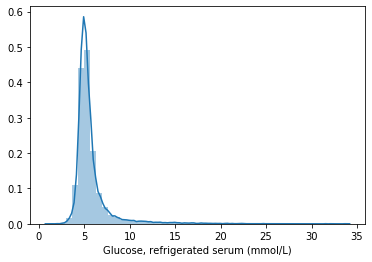

In [139]:
sns.distplot(df['Glucose, refrigerated serum (mmol/L)'])

In [140]:
df['diagnostic_t2dm'].value_counts(dropna=False)

0    20113
1     3197
Name: diagnostic_t2dm, dtype: int64

In [172]:
df.groupby(['known_diabetes'])['HbA1c_correct'].describe()

,count,mean,std,min,25%,50%,75%,max
known_diabetes,,,,,,,,
1.0,2290.0,58.882367,20.501274,25.666812,44.250109,52.995190,67.205947,171.053782
2.0,18611.0,36.670761,6.711277,16.921732,33.318758,35.505028,38.784434,134.980324
3.0,460.0,43.399365,10.329312,27.853083,37.691299,40.970704,45.343244,114.210756


# Unrecognised T2DM 

In [173]:
def unrecognised_t2dm(row): 
    
    if (row['diagnostic_t2dm'] ==1): 
        
        if row['known_diabetes']==1: 
            return('Recognised T2DM')
        
        else: 
            return('Unrecognised T2DM')
        
    else: 
        return('Not diabetic')


In [174]:
df['unrecognised_t2dm'] = df.apply(unrecognised_t2dm, axis=1)

In [175]:
df['unrecognised_t2dm'].value_counts(dropna=False)

Not diabetic         20113
Recognised T2DM       1881
Unrecognised T2DM     1316
Name: unrecognised_t2dm, dtype: int64

In [176]:
unrecognised_m = df['unrecognised_t2dm'] == 'Unrecognised T2DM'
unrecognised_df = df[unrecognised_m]

recognised_m = df['unrecognised_t2dm'] == 'Recognised T2DM'
recognised_df = df[recognised_m]

In [178]:
#41.6% of all participants with biochemical evidence of T2DM were not aware of their diabetic status 
1316/(1316+1881)

0.41163590866437283

In [179]:
df['known_diabetes'].value_counts(dropna=False)

2.0    20049
1.0     2747
3.0      514
Name: known_diabetes, dtype: int64

In [180]:
df.groupby('known_diabetes')['unrecognised_t2dm'].value_counts(dropna=False)

known_diabetes  unrecognised_t2dm
1.0             Recognised T2DM       1881
                Not diabetic           866
2.0             Not diabetic         18876
                Unrecognised T2DM     1173
3.0             Not diabetic           371
                Unrecognised T2DM      143
Name: unrecognised_t2dm, dtype: int64

In [181]:
df.groupby('unrecognised_t2dm')['HbA1c_correct'].describe()

,count,mean,std,min,25%,50%,75%,max
unrecognised_t2dm,,,,,,,,
Not diabetic,18583.0,36.107156,4.312937,16.921732,33.318758,35.505028,38.784434,47.529515
Recognised T2DM,1620.0,66.193110,20.084853,32.225623,51.902055,59.554001,74.857892,171.053782
Unrecognised T2DM,1158.0,51.011877,17.270686,22.387407,40.970704,47.529515,52.995190,134.980324


In [182]:
unrecognised_df['Glucose, refrigerated serum (mmol/L)'].describe()

count    1303.000000
mean        7.798542
std         3.183047
min         3.720000
25%         6.110000
50%         6.830000
75%         8.020000
max        29.810000
Name: Glucose, refrigerated serum (mmol/L), dtype: float64

In [183]:
def abnormal_rbg(row): 
    
    if row['Glucose, refrigerated serum (mmol/L)'] >= 11.1: 
        return(1)
    else: 
        return(0)
    
unrecognised_df['abnormal_rbg'] = unrecognised_df.apply(abnormal_rbg, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [184]:
unrecognised_df['abnormal_rbg'].value_counts(dropna=False)

0    1164
1     152
Name: abnormal_rbg, dtype: int64

In [185]:
152/1316

0.11550151975683891

In [190]:
df.groupby('unrecognised_t2dm')['statin'].value_counts(dropna=False)

unrecognised_t2dm  statin
Not diabetic       0         17177
                   1          2936
Recognised T2DM    1          1017
                   0           864
Unrecognised T2DM  0           942
                   1           374
Name: statin, dtype: int64

In [186]:
df.groupby('unrecognised_t2dm')['ace_arbs'].value_counts(dropna=False)

unrecognised_t2dm  ace_arbs
Not diabetic       0           17246
                   1            2867
Recognised T2DM    1            1021
                   0             860
Unrecognised T2DM  0             948
                   1             368
Name: ace_arbs, dtype: int64

# Treatment 

In [193]:
df[['metformin', 'other_agents', 'insulin', 'ace_arbs', 'statin']].sum()

metformin       1750
other_agents     651
insulin          731
ace_arbs        4256
statin          4327
dtype: int64

In [194]:
df.groupby('known_diabetes')[['metformin', 'insulin', 'other_agents']].sum()

,metformin,insulin,other_agents
known_diabetes,,,
1.0,1546,721,607
2.0,126,10,35
3.0,78,0,9


In [161]:
df.groupby('known_diabetes')['statin'].value_counts(dropna=False)

known_diabetes  statin
1.0             1          1459
                0          1288
2.0             0         17354
                1          2695
3.0             0           341
                1           173
Name: statin, dtype: int64

In [162]:
df.groupby('known_diabetes')['ace_arbs'].value_counts(dropna=False)

known_diabetes  ace_arbs
1.0             1            1462
                0            1285
2.0             0           17424
                1            2625
3.0             0             345
                1             169
Name: ace_arbs, dtype: int64

In [163]:
2301/(2301+16310)

0.12363655902423298

# Contribution to composite 

What proportion of people with dyglycaemia had an abnoraml biochemical result

In [229]:
def composite(row): 
    
    if ((row['hba1c_result'] == 1.0) & (row['ogtt_result'] == 1)): 
        return('Both')
    
    elif ((row['hba1c_result'] == 0.0) & (row['ogtt_result'] == 0)): 
        return('Neither')
    
    elif ((row['hba1c_result']== np.nan) & (row['ogtt_result'] == 0)): 
        return('Neither')
    
    elif ((row['hba1c_result'] == 0.0) & (row['ogtt_result'] == 1)): 
        return('OGTT only')
    
    elif ((row['hba1c_result'] == np.nan) & (row['ogtt_result'] == 1)): 
        return('OGTT only')
    
    elif ((row['hba1c_result'] == 1.0) & (row['ogtt_result'] == 0)): 
        return('HbA1c only')
    

In [230]:
diabetes_tests = ['hba1c_result', 'Fasting Glucose (mmol/L)', 'Two Hour Glucose(OGTT) (mmol/L)']

In [231]:
#remove participants with no laboratory values 
labs = ['Alanine Aminotransferase (ALT) (U/L)',
       'Albumin, refrigerated serum (g/dL)',
       'Alkaline Phosphatase (ALP) (U/L)',
       'Aspartate Aminotransferase (AST) (U/L)', 'Bicarbonate (mmol/L)',
       'Blood Urea Nitrogen (g/dL)', 'Chloride (mmol/L)',
       'Cholesterol, refrigerated serum (mg/dL)',
       'Creatinine, refrigerated serum (umol/L)',
       'Gamma Glutamyl Transferase (GGT) (U/L)',
       'Glucose, refrigerated serum (mmol/L)', 'Potassium (mmol/L)',
       'Sodium (mmol/L)', 'Total Bilirubin (umol/L)', 'Total Calcium (mmol/L)',
       'Triglycerides, refrig serum (mg/dL)', 'LDL cholesterol (mmol/L)',
       'HDL cholesterol (mmol/L)', 'eGFR', 'Fasting Glucose (mmol/L)',
       'Two Hour Glucose(OGTT) (mmol/L)']

In [232]:
df.dropna(how='all', subset=diabetes_tests, inplace=True)
df.dropna(how='all', subset=labs, inplace=True)

In [233]:
df['composite'] = df.apply(composite, axis=1)

In [238]:
df[df['composite'].isnull()]['hba1c_result'].value_counts()

Series([], Name: hba1c_result, dtype: int64)

In [235]:
df['composite'].value_counts(dropna=False)

Neither       18583
NaN            1949
HbA1c only     1175
Both            858
OGTT only       745
Name: composite, dtype: int64

In [201]:
df.dropna(how='all', subset=diabetes_tests)['composite'].value_counts(dropna=False)

Neither       18583
NaN            1949
HbA1c only     1175
Both            858
OGTT only       745
Name: composite, dtype: int64

In [237]:
419+745

1164

In [ ]:
2022